# Multi-Dimensional Dynamic Time Warp


Multi-dimensional dynamic time warp(MD-DTW) é uma extensão da técnica DTW
para lidar com series temporais multidimensionais.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

Funcão auxiliar para plotar as matrizes:

In [2]:
def distance_cost_plot(_distances):
    plt.imshow(_distances, interpolation='nearest', cmap='Reds')
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar()

Função auxliar para estruturar as curvas muldimensionais:

In [3]:
def gen_md_curve(data, sel_dofs):
    md_curve = np.array(data[sel_dofs[0]])

    for dof in sel_dofs[1:]:
        md_curve = np.vstack((md_curve, data[dof]))
    return md_curve

Principal função:

In [4]:
def dtw_md(md_curvex, md_curvey, displaydist=False, displaycumcost=False):
    x_len = np.size(md_curvex, 1)
    y_len = np.size(md_curvey, 1)
    distances = np.zeros((y_len, x_len))
    for i in range(y_len):
        for j in range(x_len):
            distances[i, j] = np.sum(np.abs(md_curvey[:, i] - md_curvex[:, j]))

    accumulated_cost = np.zeros((y_len, x_len))
    accumulated_cost[0, 0] = distances[0, 0]
    for i in range(1, x_len):
        accumulated_cost[0, i] = distances[0, i] + accumulated_cost[0, i - 1]
    for i in range(1, y_len):
        accumulated_cost[i, 0] = distances[i, 0] + accumulated_cost[i - 1, 0]
    for i in range(1, y_len):
        for j in range(1, x_len):
            accumulated_cost[i, j] = min(accumulated_cost[i - 1, j - 1], accumulated_cost[i - 1, j],
                                         accumulated_cost[i, j - 1]) + distances[i, j]

    path = []
    cost = 0
    i = y_len - 1
    j = x_len - 1
    while i >= 0 and j >= 0:
        path.append([j, i])
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if accumulated_cost[i - 1, j] == min(accumulated_cost[i - 1, j - 1], accumulated_cost[i - 1, j],
                                                 accumulated_cost[i, j - 1]):
                i -= 1
            elif accumulated_cost[i, j - 1] == min(accumulated_cost[i - 1, j - 1], accumulated_cost[i - 1, j],
                                                   accumulated_cost[i, j - 1]):
                j -= 1
            else:
                i -= 1
                j -= 1

    for [y, x] in path:
        cost = cost + distances[x, y]

    path_x = [point[0] for point in path]
    path_y = [point[1] for point in path]

    if displaycumcost:
        plt.title('Matrix de custos acumulados')
        distance_cost_plot(accumulated_cost)
        plt.plot(path_x, path_y)
        plt.show()

    if displaydist:
        plt.title('Matrix de distancias')
        distance_cost_plot(distances)
        plt.plot(path_x, path_y)
        plt.show()

    return cost

Duas curvas multdimensionais, 3 dimensões cada, para exemplificar:

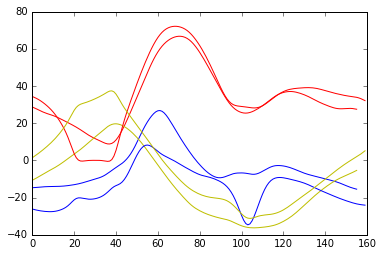

In [19]:
fileX = './cleanNpyData/filt_HDM_bk_walk2StepsLstart_009_120.npy'
dataX = np.load(fileX)
fileY = './cleanNpyData/filt_HDM_dg_walk2StepsLstart_017_120.npy'
dataY = np.load(fileY)

selDOFs = [
    'rhipjoint__rfemur_rx',  # hip
    'rfemur__rtibia_rx',  # knee
    'rtibia__rfoot_rx',  # ankle
]

MD_curveX = gen_md_curve(dataX, selDOFs)
normMD_curveX = stats.zscore(MD_curveX, axis=1)

MD_curveY = gen_md_curve(dataY, selDOFs)
normMD_curveY = stats.zscore(MD_curveY, axis=1)

plt.plot(MD_curveX[1, :],'r')
plt.plot(MD_curveX[2, :],'b')
plt.plot(MD_curveX[0, :],'y')

plt.plot(MD_curveY[1, :],'r')
plt.plot(MD_curveY[2, :],'b')
plt.plot(MD_curveY[0, :],'y')

Realizamos o MD-DTW, obtemos as matrizes de distâncias e a matriz de custos acumulados:

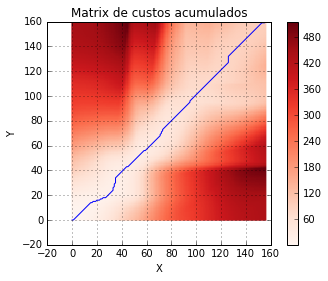

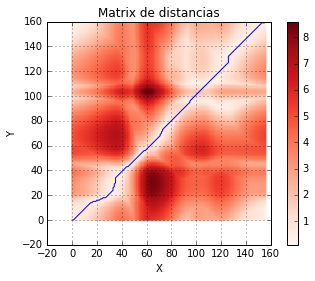

In [5]:
dist = dtw_md(normMD_curveX, normMD_curveY, displaydist=True, displaycumcost= True)

A distância DTW entre as curvas:

In [20]:
dist

95.658242044025116